In [1]:
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt

In [2]:
zipfile.ZipFile('names.zip').extractall('.')

In [3]:
os.listdir('names')

['yob2000.txt',
 'yob2014.txt',
 'yob1938.txt',
 'yob1910.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1911.txt',
 'yob1939.txt',
 'yob2001.txt',
 'yob2003.txt',
 'yob1907.txt',
 'yob1913.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1912.txt',
 'yob1906.txt',
 'yob2002.txt',
 'yob2012.txt',
 'yob2006.txt',
 'yob1902.txt',
 'yob1916.txt',
 'yob1889.txt',
 'yob1888.txt',
 'yob1917.txt',
 'yob1903.txt',
 'yob2007.txt',
 'yob2013.txt',
 'yob2005.txt',
 'yob2011.txt',
 'yob1915.txt',
 'yob1901.txt',
 'yob1929.txt',
 'yob1928.txt',
 'yob1900.txt',
 'yob1914.txt',
 'yob2010.txt',
 'yob2004.txt',
 'yob1973.txt',
 'yob1967.txt',
 'yob1998.txt',
 'yob1999.txt',
 'yob1966.txt',
 'yob1972.txt',
 'yob1958.txt',
 'yob1964.txt',
 'yob1970.txt',
 'yob1971.txt',
 'yob1965.txt',
 'yob1959.txt',
 'yob1961.txt',
 'yob1975.txt',
 'yob1949.txt',
 'yob1948.txt',
 'yob1974.txt',
 'yob1960.txt',
 'yob1976.txt',
 'yob1962.txt',
 'yob1989.txt',
 'yob1988.txt',
 'yob1963.txt',
 'yob1977.txt',
 'yob1952.txt',
 'yob194

In [4]:
df_list = []

for year in range(1880,2015):
    df = pd.read_csv(f"names/yob{year}.txt", header=None, names=["name","sex","number"])
    df['year'] = year
    df_list.append(df)

allyears = pd.concat(df_list)

In [5]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [6]:
allyears.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


In [7]:
totals_bysex = allyears.groupby(["sex", "name"])["number"].sum().unstack("sex")
totals_bysex.head()

sex,F,M
name,,
Aaban,NaN,72.0
Aabha,21.0,NaN
Aabid,NaN,5.0
Aabriella,10.0,NaN
Aadam,NaN,196.0


In [8]:
totals_both = totals_bysex.sum(axis=1)
totals_both.head()

name
Aaban         72.0
Aabha         21.0
Aabid          5.0
Aabriella     10.0
Aadam        196.0
dtype: float64

In [9]:
ratio = totals_bysex["F"] / totals_bysex["M"]
ratio.head()

name
Aaban       NaN
Aabha       NaN
Aabid       NaN
Aabriella   NaN
Aadam       NaN
dtype: float64

In [10]:
totals_both = totals_both[(ratio > 0.25) & (ratio < 4)].sort_values(ascending = False)
totals_both.head(10)

name
Willie    593888.0
Jordan    479434.0
Taylor    416096.0
Leslie    376587.0
Jamie     350262.0
Angel     301425.0
Lee       291691.0
Jessie    274931.0
Marion    259549.0
Dana      243517.0
dtype: float64

In [11]:
allyears_indexed = allyears.set_index(["sex","name","year"]).sort_index()
allyears_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
...                    ...
M   Zytavious 2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

In [12]:
def plotname(sex, name):
    data = allyears_indexed.loc[sex, name]
    plt.plot(data.index, data.values, label=name+' '+sex)

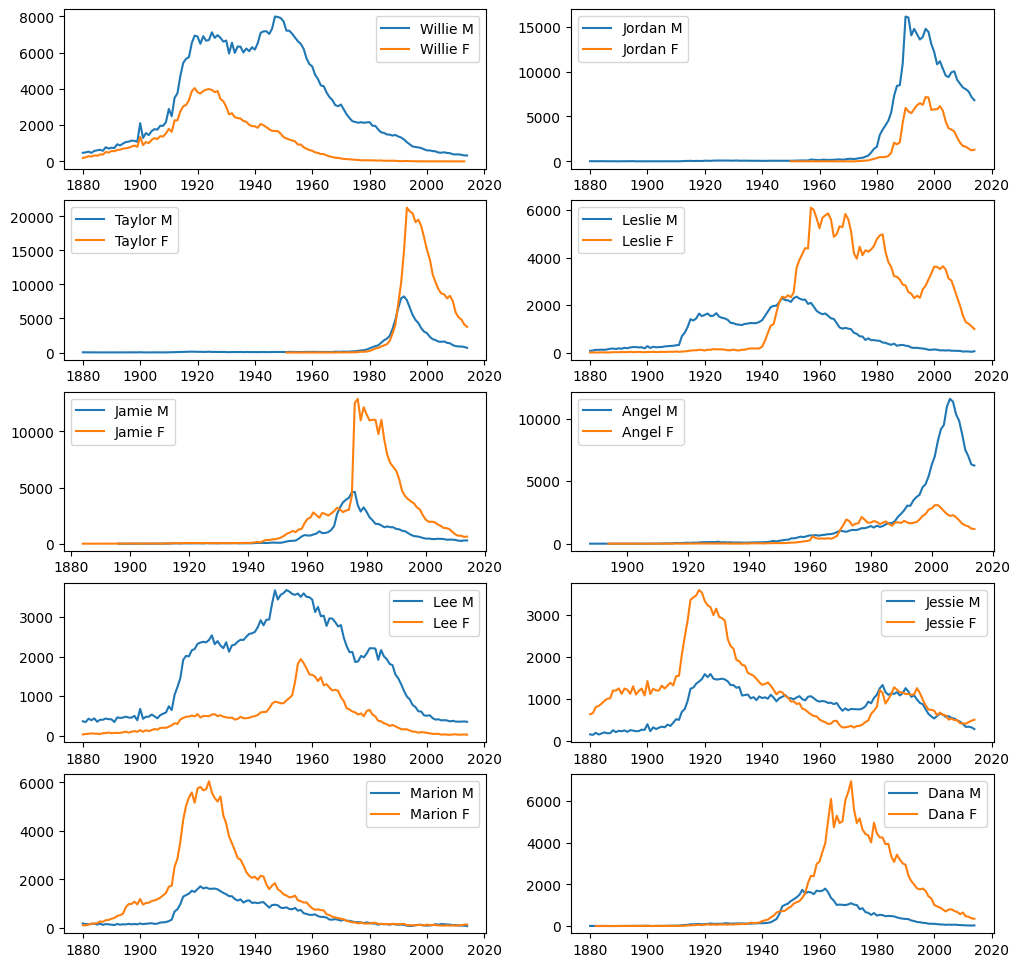

In [13]:
names = totals_both.head(10).index.values

fig, axs = plt.subplots(5, 2, figsize=(12, 12))

for i, name in enumerate(names):
    plt.subplot(5,2,i+1)
    plotname('M', name)
    plotname('F', name)
    plt.legend(loc='best')